In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = fetch_preprocess_dataset()

In [3]:
# loading 1-week model predictions 
# ==============================================================================

en1 = pd.read_csv('elasticnetbacktesting002preds1.csv')\
.rename(columns={'Unnamed: 0':'weekstart'}).set_index('weekstart')
en1.index = pd.to_datetime(en1.index)
enf1_mae, enf1_rmse = metrics(en1[date(2018,1,1):], df['cases'][date(2018,1,1):])

sm1 = pd.read_csv('sarimxbacktesting002preds1.csv')\
.rename(columns={'Unnamed: 0':'weekstart'}).set_index('weekstart')
sm1.index = pd.to_datetime(sm1.index)
smf1_mae, smf1_rmse = metrics(sm1[date(2018,1,1):], df['cases'][date(2018,1,1):])

rf1 = pd.read_csv('randomforestbacktesting002preds1.csv')\
.rename(columns={'Unnamed: 0':'weekstart'}).set_index('weekstart')
rf1.index = pd.to_datetime(rf1.index)
rff1_mae, rff1_rmse = metrics(rf1[date(2018,1,1):], df['cases'][date(2018,1,1):])

b1 = pd.read_csv('baseline_002preds1.csv')\
.rename(columns={'Unnamed: 0':'weekstart'}).set_index('weekstart')
b1.index = pd.to_datetime(b1.index)
base1_mae, base1_rmse = metrics(b1[date(2018,1,1):], df['cases'][date(2018,1,1):])

In [4]:
# loading 2-week model predictions 
# ==============================================================================

en2 = pd.read_csv('elasticnetbacktesting002preds2.csv')\
.rename(columns={'Unnamed: 0':'weekstart'}).set_index('weekstart')
en2.index = pd.to_datetime(en2.index)
enf2_mae, enf2_rmse = metrics(en2[date(2018,1,1):], df['cases'][date(2018,1,1):])

sm2 = pd.read_csv('sarimxbacktesting002preds2.csv')\
.rename(columns={'Unnamed: 0':'weekstart'}).set_index('weekstart')
sm2.index = pd.to_datetime(sm2.index)
smf2_mae, smf2_rmse = metrics(sm2[date(2018,1,1):], df['cases'][date(2018,1,1):])

rf2 = pd.read_csv('randomforestbacktesting002preds2.csv')\
.rename(columns={'Unnamed: 0':'weekstart'}).set_index('weekstart')
rf2.index = pd.to_datetime(rf2.index)
rff2_mae, rff2_rmse = metrics(rf2[date(2018,1,1):], df['cases'][date(2018,1,1):])

b2 = pd.read_csv('baseline_002preds2.csv')\
.rename(columns={'Unnamed: 0':'weekstart'}).set_index('weekstart')
b2.index = pd.to_datetime(b2.index)
base2_mae, base2_rmse = metrics(b2[date(2018,1,1):], df['cases'][date(2018,1,1):])

In [5]:
# table 1-week prediction metrics
# ==============================================================================

round(pd.DataFrame([
        [base1_mae,base1_rmse],
        [smf1_mae,smf1_rmse],
        [enf1_mae,enf1_rmse],
        [rff1_mae,rff1_rmse],
        ], dtype=int, 
        columns=['Mean Absolute Error','Root Mean Square Error'],
        index=['Seasonal Naive','SARIMAX','ElasticNet','RandomForest',])) \
.style.set_caption('One-Week Forecast Metrics')

,Mean Absolute Error,Root Mean Square Error
Seasonal Naive,305,586
SARIMAX,344,1101
ElasticNet,246,398
RandomForest,203,327


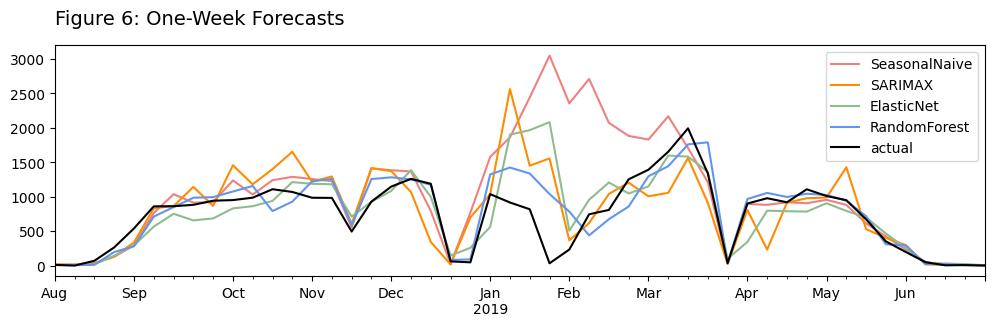

In [6]:
# plot 1-week predictions
# ==============================================================================

fig, ax = plt.subplots(figsize=(12, 3))

b1[date(2018,8,1):date(2019,7,1)]\
.rename(columns={'pred':'SeasonalNaive'})\
.plot(ax=ax,color="lightcoral")

sm1[date(2018,8,1):date(2019,7,1)]\
.rename(columns={'pred':'SARIMAX'})\
.plot(ax=ax, color='darkorange')

en1[date(2018,8,1):date(2019,7,1)]\
.rename(columns={'pred':'ElasticNet'})\
.plot(ax=ax, color='darkseagreen')

rf1[date(2018,8,1):date(2019,7,1)]\
.rename(columns={'pred':'RandomForest'})\
.plot(ax=ax,color='cornflowerblue')

df['cases'][date(2018,8,1):date(2019,7,1)]\
.plot(ax=ax, label='actual', color='black')

ax.set_title('Figure 6: One-Week Forecasts',
                loc='left', 
                fontdict={'fontsize': 14,
                        'fontweight': 50,
                        'color': 'black',
                        'verticalalignment': 'baseline',
                        'horizontalalignment': 'left'},
                pad=15)
plt.xlabel('')
ax.legend()

In [7]:
# loading 2-week model predictions 
# ==============================================================================

en2 = pd.read_csv('elasticnetbacktestingpreds2.csv')\
.rename(columns={'Unnamed: 0':'weekstart'}).set_index('weekstart')
en2.index = pd.to_datetime(en2.index)

sm2 = pd.read_csv('sarimxbacktestingpreds2.csv')\
.rename(columns={'Unnamed: 0':'weekstart'}).set_index('weekstart')
sm2.index = pd.to_datetime(sm2.index)

rf2 = pd.read_csv('randomforestbacktestingpreds2.csv')\
.rename(columns={'Unnamed: 0':'weekstart'}).set_index('weekstart')
rf2.index = pd.to_datetime(rf2.index)

b2 = pd.read_csv('baseline_preds2.csv')\
.rename(columns={'Unnamed: 0':'weekstart'}).set_index('weekstart')
b2.index = pd.to_datetime(b2.index)

In [8]:
# table 2-week prediction metrics
# ==============================================================================

round(pd.DataFrame([
        [base2_mae,base2_rmse],
        [smf2_mae,smf2_rmse],
        [enf2_mae,enf2_rmse],
        [rff2_mae,rff2_rmse],
        ], dtype=int, 
        columns=['Mean Absolute Error','Root Mean Square Error'],
        index=['Seasonal Naive','SARIMAX','ElasticNet','RandomForest',])) \
.style.set_caption('Two-Week Forecast Metrics')

,Mean Absolute Error,Root Mean Square Error
Seasonal Naive,305,586
SARIMAX,355,1106
ElasticNet,265,453
RandomForest,217,369


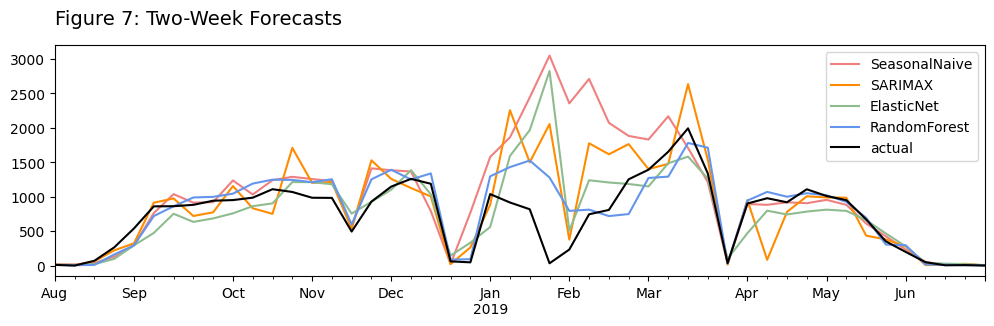

In [9]:
# plot 2-week predictions
# ==============================================================================

fig, ax = plt.subplots(figsize=(12, 3))

b2[date(2018,8,1):date(2019,7,1)]\
.rename(columns={'pred':'SeasonalNaive'})\
.plot(ax=ax,color="lightcoral")

sm2[date(2018,8,1):date(2019,7,1)]\
.rename(columns={'pred':'SARIMAX'})\
.plot(ax=ax, color='darkorange')

en2[date(2018,8,1):date(2019,7,1)]\
.rename(columns={'pred':'ElasticNet'})\
.plot(ax=ax, color='darkseagreen')

rf2[date(2018,8,1):date(2019,7,1)]\
.rename(columns={'pred':'RandomForest'})\
.plot(ax=ax,color='cornflowerblue')

df['cases'][date(2018,8,1):date(2019,7,1)]\
.plot(ax=ax, label='actual', color='black')

ax.set_title('Figure 7: Two-Week Forecasts',
                loc='left', 
                fontdict={'fontsize': 14,
                        'fontweight': 50,
                        'color': 'black',
                        'verticalalignment': 'baseline',
                        'horizontalalignment': 'left'},
                pad=15)
plt.xlabel('')
ax.legend()

